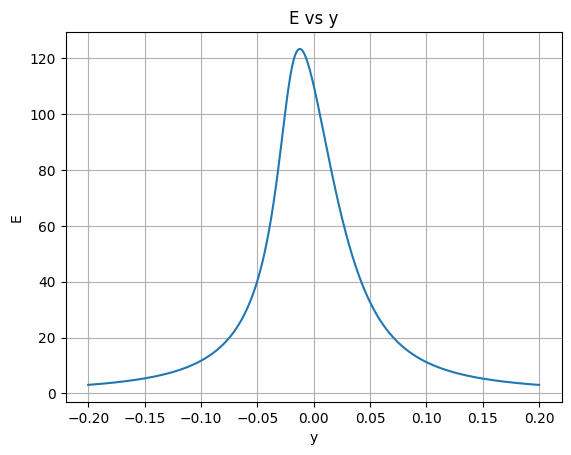

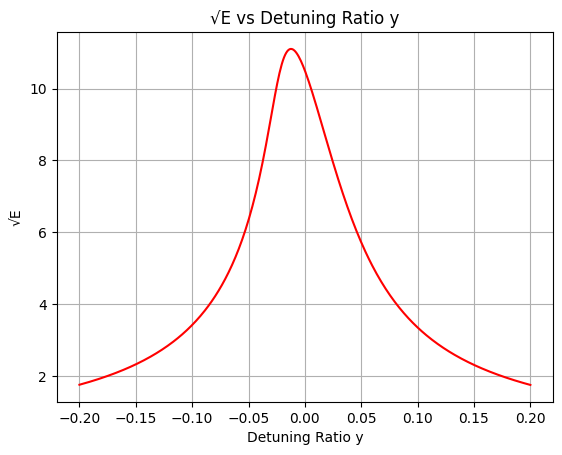

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
w0 = 100e9  # 100 GHz
K = -9.99e-5* w0
r = 0.032* w0

# Function to define the equation for E
def equation(E, y, w0, K, r):
    term1 = (2 * y * w0 * E**2) / K
    term2 = (y**2 * w0**2 + r**2) * E / K**2
    term3 = 2 * r**3 / (3**(3/2) * K**2 * abs(K))
    return E**3 - term1 + term2 - term3

# Generate y values
y_values = np.linspace(-0.2, 0.2, 400)
# y= w_0-w_p/w_0
# E = B**2

# Solve for E for each y value
E_values = []
for y in y_values:
    E_initial_guess = 0  # Initial guess for E
    E_solution = fsolve(equation, E_initial_guess, args=(y, w0, K, r))[0]
    E_values.append(E_solution)
    sqrt_E_values = np.sqrt(np.abs(E_values))

# Plotting E vs y
plt.plot(y_values, E_values)
plt.xlabel('y')
plt.ylabel('E')
plt.title('E vs y')
plt.grid(True)
plt.show()

# Plot for sqrt(E) vs y
plt.plot(y_values, sqrt_E_values, label="√E", color='red')
plt.xlabel('Detuning Ratio y')
plt.ylabel('√E')
plt.title('√E vs Detuning Ratio y')
plt.grid(True)
plt.show()


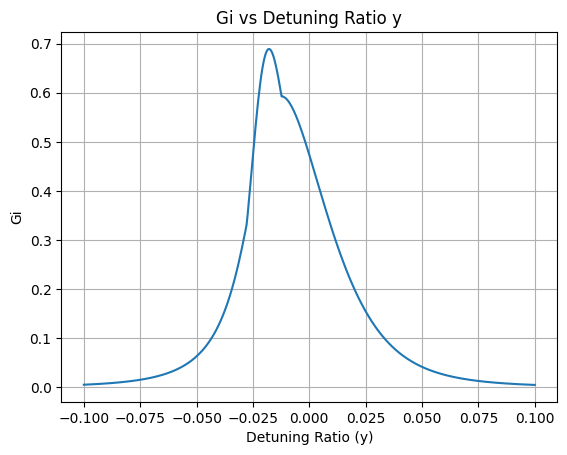

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
w0 = 100e9  # 100 GHz
K = -9.99e-5 * w0
r = 0.032* w0

# Function to define the equation for E
def equation(E, y, w0, K, r):
    term1 = (2 * y * w0 * E**2) / K
    term2 = (y**2 * w0**2 + r**2) * E / K**2
    term3 = 2 * r**3 / (3**(3/2) * K**2 * abs(K))
    return E**3 - term1 + term2 - term3

# Generate y values (detuning ratio)
y_values = np.linspace(-0.1, 0.1, 400)

# Solve for E and calculate Gi for each y value
Gi_values = []
E_initial_guess = 0.1  # Start with a small non-zero initial guess

for y in y_values:
    # Solve the cubic equation for E
    E_solution = fsolve(equation, E_initial_guess, args=(y, w0, K, r))[0]

    # Calculate sqrt_term, lambda_0, lambda_1, |V|^2, and Gi
    sqrt_term = np.sqrt(np.maximum(0, K**2 * E_solution**2 - (-y * w0 + 2 * K * E_solution)**2))
    lambda_0 = r - sqrt_term
    lambda_1 = r + sqrt_term

    # Ensure that lambda_0 and lambda_1 are real and positive
    if lambda_0 <= 0 or lambda_1 <= 0:
        Gi_values.append(np.nan)
    else:
        V_squared = K**2 * (np.abs(E_solution))**2
        Gi = (4 * r**2 * V_squared) / (lambda_1**2 * lambda_0**2)
        Gi_values.append(Gi)

    # Update initial guess for the next iteration
    E_initial_guess = E_solution

# Plotting Gi vs y
plt.plot(y_values, Gi_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel('Gi')
plt.title('Gi vs Detuning Ratio y')
plt.grid(True)
plt.show()

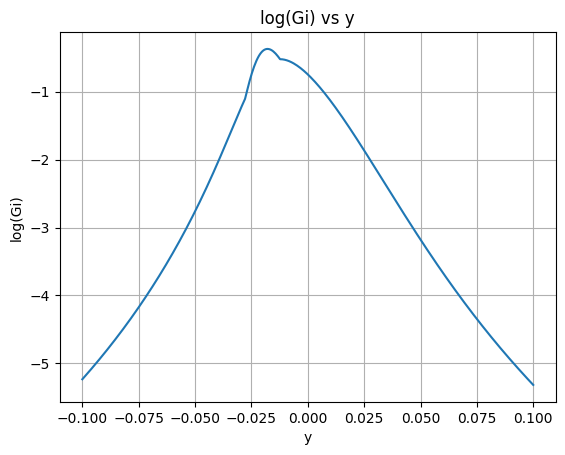

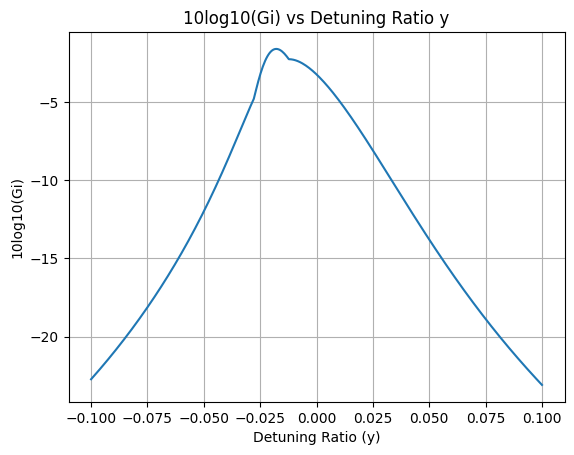

In [ ]:
# Convert Gi values to log(Gi), ignoring NaN values
log_Gi_values = np.log(Gi_values)

# Plotting log(Gi) vs y
plt.plot(y_values, log_Gi_values)
plt.xlabel('y')
plt.ylabel('log(Gi)')
plt.title('log(Gi) vs y')
plt.grid(True)
plt.show()

log_Gi_values = 10 * np.log10(np.array(Gi_values))

# Plotting 10log10(Gi) vs y
plt.plot(y_values, log_Gi_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel('10log10(Gi)')
plt.title('10log10(Gi) vs Detuning Ratio y')
plt.grid(True)
plt.show()

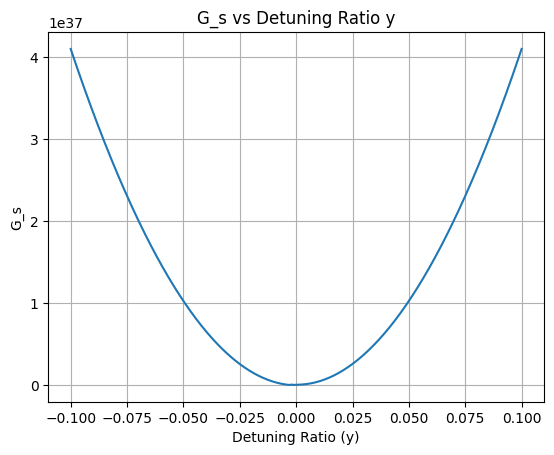

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
w0 = 100e9  # 100 GHz
K = -9.99e-5 * w0
r = 0.0032 * w0

# Function to define the equation for E
def equation(E, y, w0, K, r):
    term1 = (2 * y * w0 * E**2) / K
    term2 = (y**2 * w0**2 + r**2) * E / K**2
    term3 = 2 * r**3 / (3**(3/2) * K**2 * abs(K))
    return E**3 - term1 + term2 - term3

# Generate y values (detuning ratio)
y_values = np.linspace(-0.1, 0.1, 400)

# Solve for E and calculate G_s for each y value
G_s_values = []
E_initial_guess = 0.1  # Start with a small non-zero initial guess

for y in y_values:
    # Solve the cubic equation for E
    E_solution = fsolve(equation, E_initial_guess, args=(y, w0, K, r))[0]

    # Calculate sqrt_term, lambda_0, lambda_1, and W*
    sqrt_term = np.sqrt(np.maximum(0, K**2 * E_solution**2 - (-y * w0 + 2 * K * E_solution)**2))
    lambda_0 = r - sqrt_term
    lambda_1 = r + sqrt_term
    W_star = 1j * (y * w0) + r - 2j * K * E_solution

    # Ensure that lambda_0 and lambda_1 are real and positive
    if lambda_0 <= 0 or lambda_1 <= 0:
        G_s_values.append(np.nan)
    else:
        # Calculate G_s
        G_s = np.abs((lambda_0) * (lambda_1) - 2 * r * (W_star))**2/ (lambda_0**2) * (lambda_1**2)
        G_s_values.append(np.max(G_s))  # Taking the maximum value of G_s over the frequency range

    # Update initial guess for the next iteration
    E_initial_guess = E_solution

# Plotting G_s vs y
plt.plot(y_values, G_s_values)
plt.xlabel('Detuning Ratio (y)')
plt.ylabel('G_s')
plt.title('G_s vs Detuning Ratio y')
plt.grid(True)
plt.show()
